In [ ]:
# Useful Links
# 1. https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/
# 2. https://machinelearningknowledge.ai/keras-implementation-of-resnet-50-architecture-from-scratch/
# 3. https://towardsdatascience.com/resnets-for-cifar-10-e63e900524e0 (Understanding the resnet architecture for cifar10)


In [5]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import tensorflow as tf

In [6]:
# Load necessary libraries
import os
import pandas as pd
import numpy as np
#import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD, Adam
#from google.colab.patches import cv2_imshow
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint, ReduceLROnPlateau, CSVLogger
from tensorflow.keras.models import Sequential, Model,load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D,Dropout
from tensorflow.keras.preprocessing import image
from tensorflow.keras.initializers import glorot_uniform
from matplotlib import pyplot as plt
from tensorflow.keras.utils import to_categorical, plot_model




In [7]:
def load_dataset(dName="CIFAR10"):
    dataset = None
    num_classes = None
    if dName == "CIFAR10":
        num_classes = 10
        dataset = tf.keras.datasets.cifar10.load_data()
    if dName == "CIFAR100":
        num_classes = 100
        dataset = tf.keras.datasets.cifar100.load_data()
    (X_train, y_train), (X_test, y_test) = dataset
    # Convert target value to categorical values
    # One-hot-encoded target values
    y_train = to_categorical(y_train,num_classes)
    y_test = to_categorical(y_test, num_classes)
    
    return (X_train, y_train),(X_test, y_test)

In [8]:
def divideDataset(X_train, y_train, X_test,y_test):
    dataLength = X_train.shape[0]
    trainLen=0
    dataTrain = []
    dataTest = []
    percent = 0.2
    while(trainLen<dataLength):
        trainLen = int(X_train.shape[0]*percent)
        print(X_train[:trainLen].shape)
        train = (X_train[:trainLen],y_train[:trainLen])
        retriveLen = int(X_test.shape[0]*percent)
        test = (X_test[:retriveLen],y_test[:retriveLen])
        #print(tuple(train))
        dataTrain.append(train)
        dataTest.append(test)
        print("\n")
        percent +=0.2
    return dataTrain, dataTest

In [9]:
(X_train, y_train),(X_test, y_test) = load_dataset()
dataTrain, dataTest = divideDataset(X_train, y_train, X_test, y_test) # this contains the list of 5 different datasets

170508288/170498071 [==============================] - 2s 0us/step
(10000, 32, 32, 3)


(20000, 32, 32, 3)


(30000, 32, 32, 3)


(40000, 32, 32, 3)


(50000, 32, 32, 3)




In [10]:
def describeDataset(X_train, y_train, X_test, y_test):
    print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
    print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))

In [11]:
def displayImage(images=None):
    if images.any():
        # Plot a few images
        for i in range(9):
            plt.subplot(330+1+i)
            plt.imshow(images[i])
        plt.show()
    else:
        print('Error! File is empty')

In [12]:
def normalizeInput(X_train,X_test):
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    mean = np.mean(X_train, axis=(0,1,2,3))
    std = np.std(X_train,axis=(0,1,2,3))
    X_train = (X_train-mean)/(std+1e-7)
    X_test = (X_test-mean)/(std+1e-7)
    
    return X_train, X_test

In [ ]:
# plot diagnostic learning curves
def plotLearningCurve(history):
    # plot loss
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='test')
    plt.show()
    plt.close()

In [ ]:
(X_train, y_train),(X_test, y_test) = load_dataset()
describeDataset(X_train,y_train,X_test,y_test)

Train: X=(50000, 32, 32, 3), y=(50000, 10)
Test: X=(10000, 32, 32, 3), y=(10000, 10)


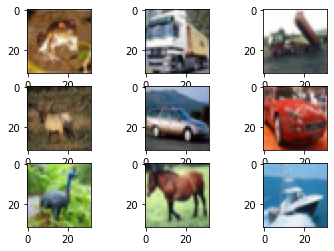

In [ ]:
displayImage(X_train) # Need to pass a numpy array

In [ ]:
##### Include Little Data Augmentation 
batch_size = 64 # try several values

train_DataGen = tf.keras.preprocessing.image.ImageDataGenerator(zoom_range=0.2, 
                                                                width_shift_range=0.1, 
                                                                height_shift_range = 0.1, 
                                                                horizontal_flip=True)
 
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator()

train_set_conv = train_DataGen.flow(X_train, y_train, batch_size=batch_size) # train_lab is categorical 
valid_set_conv = valid_datagen.flow(X_test, y_test, batch_size=batch_size) # so as valid_lab

In [ ]:
X_train, X_test = normalizeInput(dataTrain[0][0], dataTest[0][0])
y_train = dataTrain[0][1]
y_test = dataTest[0][1]

In [ ]:
#plotLearningCurve(history)

# ResNet Implementation

In [ ]:
# Code Link: https://github.com/Gurupradeep/CIFAR-10-Object-Recognition-in-Images/blob/master/Models/ResNet.ipynb

In [ ]:
if data_augmentation :
    print("-------------Using Data augmentation------------")
     # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images
    
    datagen.fit(X_train)
    model.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
                        steps_per_epoch=X_train.shape[0] // batch_size,
                        epochs=epochs,verbose=1,validation_data=(X_test,y_test),callbacks = [lr_reducer,csv_logger])
    
else :
    print("-----Not Using Data augmentation---------------")
    model.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(X_test, y_test),
              shuffle=True,callbacks = [csv_logger])

# RESNET50 WITH SKIP CONNECTION 3: Implemented by Lokesh

In [13]:
def identityBlock(X, f, filters, stage, block, p=0.0):
    k_initializer = glorot_uniform(seed=0)
    conv_name = 'res'+str(stage)+block+'_branch'
    bat_name = 'bn'+str(stage)+block+'_branch'
    
    F1, F2, F3 = filters
    
    X_skip = X
    
    X = Conv2D(filters=F1,kernel_size=(1,1),strides =(1,1),padding='valid',name=conv_name+'2a',
              kernel_initializer=k_initializer)(X)
    X = BatchNormalization(axis=3,name=bat_name+'2a')(X)
    X = Activation('relu')(X)
    X = Dropout(p)(X)
    
    X = Conv2D(filters=F2, kernel_size=(f,f),strides=(1,1),padding='same',name=conv_name+'2b',
              kernel_initializer=k_initializer)(X)
    X = BatchNormalization(axis=3,name=bat_name+'2b')(X)
    X = Activation('relu')(X)
    X = Dropout(p)(X)
    
    X = Conv2D(filters=F3,kernel_size=(1,1),strides=(1,1),padding='valid',name=conv_name+'2c',
              kernel_initializer=k_initializer)(X)
    X = BatchNormalization(axis=3,name=bat_name+'2c')(X)
    
    X = Add()([X,X_skip])
    X = Activation('relu')(X)
    X = Dropout(p)(X)
    
    return X


In [14]:
def convolutionalBlock(X, f, filters, stage, block, s=2,p=0.0):
    k_init = glorot_uniform(seed=0)
    conv_name = 'res'+str(stage)+block+'_branch'
    bat_name = 'bn'+str(stage)+block+'_branch'
    
    F1, F2, F3 = filters
    
    X_skip = X
    
    X = Conv2D(filters=F1,kernel_size=(1,1),strides=(s,s),name=conv_name+'2a',kernel_initializer=k_init)(X)
    X = BatchNormalization(axis=3,name=bat_name+'2a')(X)
    X = Activation('relu')(X)
    X = Dropout(p)(X)
    
    X = Conv2D(filters=F2, kernel_size=(f,f),strides=(1,1),padding='same', name=conv_name+'2b',kernel_initializer=k_init)(X)
    X = BatchNormalization(axis=3,name=bat_name+'2b')(X)
    X = Activation('relu')(X)
    X = Dropout(p)(X)
    
    X = Conv2D(filters=F3, kernel_size=(1,1),strides=(1,1),padding='valid',name=conv_name+'2c',kernel_initializer=k_init)(X)
    X = BatchNormalization(axis=3,name=bat_name+'2c')(X)
    
    X_skip = Conv2D(filters=F3,kernel_size=(1,1),strides=(s,s), padding='valid',name=conv_name+'1',
                   kernel_initializer=k_init)(X_skip)
    X_skip = BatchNormalization(axis=3,name=bat_name+'1')(X_skip)
    
    X = Add()([X, X_skip])
    X = Activation('relu')(X)
    X = Dropout(p)(X)
    
    return X

In [15]:
def ResNet50(input_shape=(64,64,3), classes=10):
    dropoutProb = 0.0
    X_input = Input(shape=(input_shape))
    X = ZeroPadding2D((3,3))(X_input)
    
    
    X = Conv2D(64,kernel_size=(7,7),strides=(2,2),name='conv1',kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3,name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3,3),strides=(2,2))(X)
    
    X = convolutionalBlock(X, f=3, filters=[64,64,256],stage=2,block='a',s=1)
    X = identityBlock(X,3,[64,64,256],stage=2,block='b')
    X = identityBlock(X,3,[64,64,256],stage=2,block='c')
    
    
    X = convolutionalBlock(X, f=3, filters=[128,128,512],stage=3,block='a',s=2)
    X = identityBlock(X,3,[128,128,512],stage=3,block='b')
    X = identityBlock(X,3,[128,128,512],stage=3,block='c')
    X = identityBlock(X,3,[128,128,512],stage=3,block='d')
   
    
    X = convolutionalBlock(X, f=3, filters=[256,256,1024],stage=4,block='a',s=2)
    X = identityBlock(X,3,[256,256,1024],stage=4,block='b')
    X = identityBlock(X,3,[256,256,1024],stage=4,block='c')
    X = identityBlock(X,3,[256,256,1024],stage=4,block='d')
    X = identityBlock(X,3,[256,256,1024],stage=4,block='e')
    X = identityBlock(X,3,[256,256,1024],stage=4,block='f')
    
    
    
    X = convolutionalBlock(X, f=3, filters=[512,512,2048],stage=5,block='a',s=2)
    X = identityBlock(X,3,[512,512,2048],stage=5,block='b')
    X = identityBlock(X,3,[512,512,2048],stage=5,block='c')
    
    
    X = AveragePooling2D((2,2),name='avg_pool',padding='same')(X)
    
    X = Flatten()(X)
    X = Dropout(dropoutProb)(X)
    X = Dense(classes, activation='softmax',name='fc'+str(classes),kernel_initializer=glorot_uniform(seed=0))(X)
    
    model = Model(inputs=X_input,outputs=X, name='LResNet50')
    
    return model

In [16]:
model = ResNet50(input_shape=(32,32,3),classes=10)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
X_train, X_test = normalizeInput(dataTrain[4][0], dataTest[4][0])
y_train = dataTrain[4][1]
y_test = dataTest[4][1]
history = model.fit(X_train,y_train, epochs=50,batch_size=256,validation_split=0.2,verbose=1)

In [ ]:
print(history.history)

{'loss': [0.8800014853477478, 0.8070453405380249, 0.7401796579360962, 0.7044100165367126, 0.8112926483154297, 0.730171799659729, 0.6533029079437256, 0.5808787941932678, 0.6892788410186768, 0.605333685874939, 0.4811592698097229, 0.44129082560539246, 0.42961519956588745, 0.3960455656051636, 0.38706883788108826, 0.3606114685535431, 0.348766952753067, 0.34367498755455017, 0.3212069571018219, 0.31147098541259766], 'accuracy': [0.6921250224113464, 0.7156000137329102, 0.7394999861717224, 0.751075029373169, 0.7150499820709229, 0.7451249957084656, 0.7734249830245972, 0.7968000173568726, 0.7609000205993652, 0.7914999723434448, 0.8308249711990356, 0.8461750149726868, 0.8540250062942505, 0.8646000027656555, 0.8661249876022339, 0.875374972820282, 0.8810499906539917, 0.8808000087738037, 0.8909249901771545, 0.8935999870300293], 'val_loss': [1.5354855060577393, 1.845443606376648, 1.6657755374908447, 2.1758339405059814, 1.6938974857330322, 1.8621593713760376, 1.8403420448303223, 1.6413947343826294, 1.5

In [ ]:
def plotLearningCurve(history):
    # plot loss
    epochs = [i for i in range(20) ]
    plt.title('Cross Entropy Loss')
    plt.plot(epochs,history.history['loss'], color='blue', label='train')
    plt.plot(epochs,history.history['val_loss'], color='orange', label='test')
    plt.legend(['Train Loss','Validation Loss'])
    plt.show()
    plt.close()


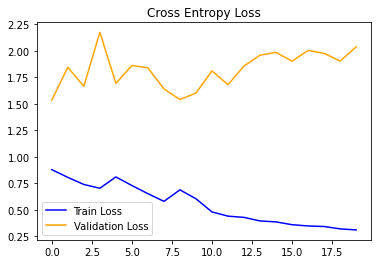

In [ ]:
plotLearningCurve(history)